# Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import nltk
import pickle
import time

from nltk.stem.porter import *
from nltk.classify import MaxentClassifier
from nltk.stem import PorterStemmer
from cleantext import clean

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

# Pre Process Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TA/dataset_TA.csv")
df

,tweet,O
0,NaN,NaN
1,Fully,O
2,funded,O
3,PhD,O
4,in,O
...,...,...
2578,#NLP,B-B-Field
2579,@SocSciScotland,O
2580,Join,O
2581,us,O


In [ ]:
df = df.iloc[1: , :]
df.reset_index(inplace=True)
df = df[['tweet', 'O']]
df

,tweet,O
0,Fully,O
1,funded,O
2,PhD,O
3,in,O
4,Antarctic,B-B-Field
...,...,...
2577,#NLP,B-B-Field
2578,@SocSciScotland,O
2579,Join,O
2580,us,O


In [ ]:
df_token = pd.DataFrame()
df_token['word'] = []
df_token['bio'] = []
df_token

,word,bio


In [ ]:
for i in range(len(df)):
  if (not pd.isna(df['tweet'][i])):
    tmp = df['tweet'][i].split()
    if (len(tmp) > 1):
      #print(tmp)
      for j in range(len(tmp)):
        if ((j % 2) != 0):
          if (tmp[j+1] == 'B-I-Country'):
            tmp[j+1] = 'B-B-Country'
          df_token = df_token.append({'word' : tmp[j], 'bio' : tmp[j+1]}, ignore_index = True)
    else:
        df_token = df_token.append({'word' : df['tweet'][i], 'bio' : df['O'][i]}, ignore_index = True)
  else:
    df_token = df_token.append({'word' : df['tweet'][i], 'bio' : df['O'][i]}, ignore_index = True)
df_token

,word,bio
0,Fully,O
1,funded,O
2,PhD,O
3,in,O
4,Antarctic,B-B-Field
...,...,...
5845,#NLP,B-B-Field
5846,@SocSciScotland,O
5847,Join,O
5848,us,O


In [ ]:
df_cek = pd.DataFrame()
df_cek['word'] = []
df_cek

,word


In [ ]:
tmp = ''
for i in range(len(df_token)):
  if (not pd.isna(df_token['word'][i])):
    tmp = tmp + df_token['word'][i] + ' '
  else:
    df_cek = df_cek.append({'word' : tmp}, ignore_index = True)
    tmp = ''
df_cek

,word
0,Fully funded PhD in Antarctic Holocene marine ...
1,"Bachelors , Masters , PhD Scholarships in Cana..."
2,Fully - funded MSc / PhD position at the Unive...
3,We have 3 fully funded #PhD positions for a pe...
4,Fully - funded Creative Technology PhD Student...
...,...
158,Fully funded PhD position at the Drexel Univer...
159,📣 Fully funded PhD position ! #histmed #STS #h...
160,Fully funded PhD project ! Want to research Ge...
161,MDC has a PhD program with fully funded positi...


In [ ]:
df_clean = pd.DataFrame()
df_clean['word'] = []
df_clean['bio'] = []
df_clean

,word,bio


In [ ]:
bad_chars = [',', ';', ':', '!', "*"]
for i in range(len(df_token)):
  if (df_token['word'][i] not in bad_chars) and (clean(df_token['word'][i], no_emoji = True) != ''):
    df_clean = df_clean.append({'word' : df_token['word'][i], 'bio' : df_token['bio'][i]}, ignore_index = True)
df_clean

,word,bio
0,Fully,O
1,funded,O
2,PhD,O
3,in,O
4,Antarctic,B-B-Field
...,...,...
5390,#PhD,O
5391,#NLP,B-B-Field
5392,@SocSciScotland,O
5393,Join,O


In [ ]:
df_lower = pd.DataFrame()
df_lower['word'] = []
df_lower['bio'] = []
df_lower = df_clean
df_lower['word'] = df_lower['word'].str.lower()
df_lower

,word,bio
0,fully,O
1,funded,O
2,phd,O
3,in,O
4,antarctic,B-B-Field
...,...,...
5390,#phd,O
5391,#nlp,B-B-Field
5392,@socsciscotland,O
5393,join,O


In [ ]:
df_pre = pd.DataFrame()
df_pre['word'] = []
df_pre['bio'] = []
df_pre = df_lower

# POS Tagging Dataset

In [ ]:
df_pos = pd.DataFrame()
df_pos['word'] = []
df_pos['tag'] = []
df_pos['bio'] = []
df_pos

,word,tag,bio


In [ ]:
tpos_start = time.time()
tmp_word = ''
tmp_bio = ''
for i in range(len(df_pre)):
  if (not pd.isna(df_pre['word'][i])):
    tmp_word = tmp_word + df_pre['word'][i] + ' '
    tmp_bio = tmp_bio + df_pre['bio'][i] + ' '
    if ((i+1) == len(df_pre)) or (pd.isna(df_pre['word'][i+1])):
      tokenized_word = tmp_word.split()
      tokenized_bio = tmp_bio.split()
      tag = nltk.pos_tag(tokenized_word)
      for j in range(len(tag)):
        df_pos = df_pos.append({'word' : tag[j][0], 'tag' : tag[j][1], 'bio' : tokenized_bio[j]}, ignore_index = True)
  else:
    df_pos = df_pos.append({'word' : ' ', 'tag' : ' ', 'bio' : ' '}, ignore_index = True)
    tmp_word = ''
    tmp_bio = ''
df_pos
tpos_end = time.time()
print("time : ", tpos_end - tpos_start)

time :  17.870417833328247


In [ ]:
df_pos

,word,tag,bio
0,fully,RB,O
1,funded,VBN,O
2,phd,NN,O
3,in,IN,O
4,antarctic,JJ,B-B-Field
...,...,...,...
5390,#phd,NNP,O
5391,#nlp,NNP,B-B-Field
5392,@socsciscotland,NNP,O
5393,join,VBP,O


# Main Program

In [ ]:
#marking end of sentence
change_of_sentence_flag = 0
#all boi tags in the data train
bio_full = []
#all boi tags in the end of sentence
bio_end = []
#all words in the start of sentence
word_start = []
bio_list = ['O', 'B-B-Field', 'B-I-Field', 'B-B-Link', 'B-B-Country',
       'B-B-Univ', 'B-I-Univ', 'B-B-Lab', 'B-B-Topic', 'B-I-Topic',
       'B-B-Deadline', 'B-I-Deadline', 'B-I-Lab']
labeled_features = []

In [ ]:
#find 0.2 of dataframe to split
break_point = 0
for i in range(len(df_pos)):
  if (i >= round(len(df_pos))*0.2) and (df_pos['word'][i] == ' '):
    break_point = i + 1
    break
print(break_point)

1097


In [ ]:
#splitting dataframe by row index
df_test = df_pos.iloc[:break_point,:]
df_train = df_pos.iloc[break_point:,:]
print("Shape of new dataframes - {} , {}".format(df_train.shape, df_test.shape))

Shape of new dataframes - (4298, 3) , (1097, 3)


In [ ]:
df_train.reset_index(inplace=True)
df_train = df_train[['word','tag', 'bio']]
df_train

,word,tag,bio
0,phd,NN,O
1,opportunity,NN,O
2,bio,SYM,B-B-Field
3,-,:,B-I-Field
4,based,VBN,B-I-Field
...,...,...,...
4293,#phd,NNP,O
4294,#nlp,NNP,B-B-Field
4295,@socsciscotland,NNP,O
4296,join,VBP,O


In [ ]:
#building input features 1
prev_bio = "start"
input_file = df_train
for line in range(len(input_file)):
  emp = input_file['word'][line].strip() == ''
  if emp:
	  change_of_sentence_flag = 1
	  prev_bio = "start"
  else:
	  word = input_file['word'][line]
	  tag = input_file['tag'][line]
	  bio = input_file['bio'][line]

		#store words that are begining of the sentence
	  if change_of_sentence_flag == 1:
		  word_start.append(word)
		  bio_end.append(bio_full[-1])
		  change_of_sentence_flag = 0
	  bio_full.append(bio)
	  item = word, tag, bio, prev_bio
	  labeled_features.append(item)
	  prev_bio = bio

In [ ]:
#calculate end transition and the end prior
dicE = {}
countTag = 0
countEnd = 0
#calculate the prior (End|state) = C(state, End)/C(state)
for i in bio_list:
	for j  in range(len(bio_end)):
		for f in bio_full:
			if j == 0:
				if i == f:
					countTag = countTag + 1
		if i == bio_end[j]:
			countEnd = countEnd + 1
	ProbE = format(countEnd/(countTag*1.0), '.5f')
	dicE.update({i: {"END":ProbE}})

	countEnd = 0
	countTag = 0
print(dicE)

{'O': {'END': '0.01130'}, 'B-B-Field': {'END': '0.01053'}, 'B-I-Field': {'END': '0.00000'}, 'B-B-Link': {'END': '0.56707'}, 'B-B-Country': {'END': '0.03448'}, 'B-B-Univ': {'END': '0.00000'}, 'B-I-Univ': {'END': '0.00000'}, 'B-B-Lab': {'END': '0.06667'}, 'B-B-Topic': {'END': '0.00000'}, 'B-I-Topic': {'END': '0.00340'}, 'B-B-Deadline': {'END': '0.00000'}, 'B-I-Deadline': {'END': '0.00000'}, 'B-I-Lab': {'END': '0.00000'}}


In [ ]:
#building input features 2
def MEMM_features(word, tag, prev_bio):
	stemmer = PorterStemmer()
	features = {}
	features['current_word'] = word
	features['current_tag'] = tag
	puc = '-'.encode("utf-8")
	#some char is outof ASCII
	features['capitalization'] = word[0].isupper()
	features['start_of_sentence'] = word in word_start
	features['cap_start'] = word not in word_start and word[0].isupper()
	features['previous_NC'] = prev_bio

	return features

In [ ]:
#model training
tmodel_start = time.time()
labeled_featuresets = [(MEMM_features(word, tag, prev_bio), bio )for (word, tag, bio, prev_bio) in labeled_features]
train_set = labeled_featuresets

f = open("my_classifier.pickle", "wb")

maxent_classifier = MaxentClassifier.train(train_set, algorithm='gis')
pickle.dump(maxent_classifier , f)

f.close()
tmodel_end = time.time()
print("time : ", tmodel_end - tmodel_start)

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -2.56495        0.722
             2          -0.64545        0.723
             3          -0.45183        0.774
             4          -0.37487        0.834
             5          -0.32617        0.869
             6          -0.29039        0.893
             7          -0.26239        0.898
             8          -0.23977        0.929
             9          -0.22109        0.940
            10          -0.20542        0.955
            11          -0.19210        0.963
            12          -0.18063        0.967
            13          -0.17067        0.970
            14          -0.16192        0.973
            15          -0.15419        0.975
            16          -0.14731        0.977
            17          -0.14114        0.978
            18          -0.13558        0.978
            19          -0.13055        0.979
 

In [ ]:
#Viterbi algorithm
def MEMM(word_list,tag_list):
	bio_list = ['O', 'B-B-Field', 'B-I-Field', 'B-B-Link', 'B-B-Country',
       'B-B-Univ', 'B-I-Univ', 'B-B-Lab', 'B-B-Topic', 'B-I-Topic',
       'B-B-Deadline', 'B-I-Deadline', 'B-I-Lab']
	w1 = word_list[0] #the first word of the sentence
	t1 = tag_list[0]
	tRange = len(bio_list)
	wRange = len(word_list)

	viterbi = [[0 for x in range(300)] for x in range(300)]
	backpointer = [['' for x in range(300)] for x in range(300)]
	#intialization
	for t in range(tRange):
		probability = maxent_classifier.prob_classify(MEMM_features(w1,t1, "start" ))
		posterior = float(probability.prob(bio_list[t]))
		#print ("bio: " + bio_list[t] + ' posterior (start)' + str(posterior))
		#score transition 0(start) -> q given w1
		viterbi[t][1] = posterior
		backpointer[t][1] = 0 #stand for q0 (start point)

	#for word w from 2 to T
	maxViterbi = 0
	maxPreviousState = 0
	maxPreTerminalProb = 0
	for w in range (1, wRange):
		for t in range (tRange):
			#find max verterbi = max (previous * posterior)
			word = word_list[w]
			tag = tag_list[w]
			probability = maxent_classifier.prob_classify(MEMM_features(word,tag,bio_list[0]))
			posterior = float(probability.prob(bio_list[t]))
			maxViterbi = float(viterbi[0][w]) * posterior
			maxPreviousState = 0
			for i in range (1, tRange):
				word = word_list[w]
				tag = tag_list[w]
				probability = maxent_classifier.prob_classify(MEMM_features(word,tag,bio_list[i]))
				posterior = float(probability.prob(bio_list[t]))
				if float(viterbi[i][w]) * posterior > maxViterbi:
					maxViterbi = float(viterbi[i][w]) * posterior
					maxPreviousState = i #content bio_list[i]
			viterbi[t][w+1] = maxViterbi
			backpointer[t][w+1] = bio_list[maxPreviousState] #points to the matrix x axis (max previous)

			maxViterbi = 0
			maxPreviousState = 0
			maxPreTerminalProb = 0
	#termination step
	#viterbi[qF, T] = max (viterbi[s,T] *as,qF)
	maxPreTerminalProb = float(viterbi[0][wRange])* float(dicE[bio_list[0]]["END"])

	maxPreviousState = 0
	for i in range (1, tRange):

		if float(viterbi[i][wRange]) * float(dicE[bio_list[i]]["END"]) > maxPreTerminalProb:
			maxPreTerminalProb = float(viterbi[i][wRange]) * float(dicE[bio_list[i]]["END"])

			maxPreviousState = i

			#print ("maxPreTerminalProb: " + str(maxPreTerminalProb))
	viterbi[tRange][wRange+1] = maxPreTerminalProb
	backpointer[tRange][wRange+1] = bio_list[maxPreviousState]
	#return POS tag path
	pathReverse = [bio_list[maxPreviousState]]
	maxPreviousTag = bio_list[maxPreviousState]

	i = 0
	while i < (wRange - 1):
		pathReverse.append(backpointer[bio_list.index(maxPreviousTag)][wRange - i])
		maxPreviousTag = backpointer[bio_list.index(maxPreviousTag)][wRange - i]
		i = i + 1

	#reverse the path to make it correct
	index = len(pathReverse)
	path = []
	while index >= 1 :
		path.append(pathReverse[index - 1])
		index = index -1
	#print(viterbi)
	#print(backpointer)
	return path

In [ ]:
df_hasil = pd.DataFrame()
df_hasil['word'] = []
df_hasil['tag'] = []
df_hasil['bio'] = []
df_hasil['pred'] = []

In [ ]:
# df_without = pd.DataFrame()
# df_without['word'] = []
# df_without['tag'] = []
# df_without['bio'] = []
# df_without['pred'] = []

In [ ]:
#MaxEnt+Viterbi = MEMM
#store words in a sentence
word_list = []
#store part-of-speech tag in a sentence
tag_list = []
#store bio tags in a sentence
bio_list = []
prev_bio = "start"
bio_list = ['O', 'B-B-Field', 'B-I-Field', 'B-B-Link', 'B-B-Country',
       'B-B-Univ', 'B-I-Univ', 'B-B-Lab', 'B-B-Topic', 'B-I-Topic',
       'B-B-Deadline', 'B-I-Deadline', 'B-I-Lab']

input_file = df_test
for line in range(len(input_file)):

	if input_file['word'][line].strip() != '':
		word = input_file['word'][line]
		tag = input_file['tag'][line]
		bio = input_file['bio'][line]
		#store words that are begining of the sentence
		word_list.append(word)
		#store tags that are the begining of the sentence
		tag_list.append(tag)
		#store the end of sentence tag in tagEndList
		bio_list.append(bio)
		if change_of_sentence_flag == 1:
			word_start.append(word)
			change_of_sentence_flag = 0
	emp = input_file['word'][line].strip() == ''  #find empty line
	if emp:
		change_of_sentence_flag = 1
		prev_bio = "start"
		path = MEMM(word_list, tag_list) #list of bio tags returned by HMM function call

		for i in range(len(word_list)):
			df_hasil = df_hasil.append({'word' : word_list[i], 'tag' : tag_list[i], 'bio' : bio_list[i], 'pred' : path[i]}, ignore_index = True)
			# if (bio_list[i] != 'O') and (path[i] != 'O'):
				#df_without = df_without.append({'word' : word_list[i], 'tag' : tag_list[i], 'bio' : bio_list[i], 'pred' : path[i]}, ignore_index = True)
		#refresh list
		word_list = []
		tag_list = []
		bio_list = []

In [ ]:
y_test = df_hasil['bio']
y_test

0                 O
1         B-B-Field
2         B-I-Field
3          B-B-Link
4       B-B-Country
           ...     
1060              O
1061              O
1062              O
1063              O
1064              O
Name: bio, Length: 1065, dtype: object

In [ ]:
y_pred = df_hasil['pred']
y_pred

0       O
1       O
2       O
3       O
4       O
       ..
1060    O
1061    O
1062    O
1063    O
1064    O
Name: pred, Length: 1065, dtype: object

In [ ]:
df_hasil['bio'].unique()

array(['O', 'B-B-Field', 'B-I-Field', 'B-B-Link', 'B-B-Country',
       'B-B-Univ', 'B-I-Univ', 'B-B-Lab', 'B-B-Topic', 'B-I-Topic',
       'B-B-Deadline', 'B-I-Deadline'], dtype=object)

In [ ]:
df_hasil['pred'].unique()

array(['O', 'B-B-Link', 'B-B-Country', 'B-B-Univ', 'B-I-Univ',
       'B-B-Field', 'B-I-Field', 'B-B-Deadline', 'B-I-Deadline',
       'B-B-Topic', 'B-I-Topic'], dtype=object)

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='macro', zero_division = 0)))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='weighted', zero_division = 0)))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['B-B-Country', 'B-B-Deadline', 'B-B-Field', 'B-B-Lab',
      'B-B-Link', 'B-B-Topic', 'B-B-Univ', 'B-I-Deadline', 'B-I-Field',
      'B-I-Topic', 'B-I-Univ', 'O'], digits = 3, zero_division = 0))

Confusion Matrix

[[  7   0   0   0   0   0   0   0   0   0   1   8]
 [  0   6   0   0   1   0   0   0   0   0   0   1]
 [  0   0   2   0   0   0   0   0   0   0   0  11]
 [  0   0   0   0   0   0   0   0   0   0   0   6]
 [  0   0   0   0  21   0   0   0   0   0   0  15]
 [  0   0   0   0   0   0   0   0   0   0   0   8]
 [  0   0   0   0   0   0  13   0   0   0   0   2]
 [  0   0   0   0   0   0   0   8   0   0   0   3]
 [  0   0   3   0   1   0   0   0  15   0   0  22]
 [  0   0   2   0   0   2   0   0   8  10   0  40]
 [  1   0   0   0   0   0   1   0   0   0  31   8]
 [  0   0   1   0   1   0   1   0   1   0   0 804]]

Accuracy: 0.8610

Micro Precision: 0.8610
Micro Recall: 0.8610
Micro F1-score: 0.8610

Macro Precision: 0.6939
Macro Recall: 0.4831
Macro F1-score: 0.5462

Weighted Precision: 0.8527
Weighted Recall: 0.8610
Weighted F1-score: 0.8315

Classification Report

              precision    recall  f1-score   support

 B-B-Country      0.875     0.438     0.583        16
B-

In [ ]:
for i in range(len(df_train)):
  if df_train['bio'][i] == 'B-B-Topic':
    print(df_train['word'][i])

spatiotemporal
security
reducing
evaluating
how
predictions
cell
how
tropical
genomic
estimating
bio
human
how
develop
#machinelearning
the
evaluating
investigating
tracking
boreal
the
the
the
mental
mhealth
exploring
nutrition
optimising
gender
the


In [ ]:
for i in range(len(df_train)):
  if df_train['bio'][i] == 'B-B-Lab':
    print(df_train['word'][i])

@mdc_berlin
@uwectlab
@humantechnopole
liser
@monashbdi
@ctsg_brighton
lias
@atmoschemyork
@atmosscience
@social__ai
@datalabscotland
@seemoolab
@uwectlab
@rwth
the


In [ ]:
for i in range(len(df_hasil)):
  if df_hasil['bio'][i] == 'B-B-Topic':
    print(df_hasil['word'][i], df_hasil['pred'][i])

and O
can O
developing O
cybercrime O
the O
cybercrime O
investigating O
cyber O


In [ ]:
for i in range(len(df_hasil)):
  if df_hasil['bio'][i] == 'B-B-Lab':
    print(df_hasil['word'][i], df_hasil['pred'][i])

geology O
@hrbireland O
@caranetwork1 O
@sphereprogramme O
@eatinglab_sbg O
@uclcrimescience O


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


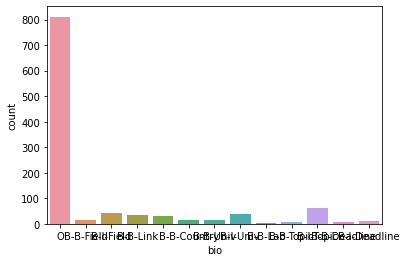

In [ ]:
import seaborn as sns
sns.countplot(df_test['bio'])